In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from utils import *
from algos import *
from plot import *

**Вариант 11**

In [4]:
def f(x):
  return x**4 + x**2 + x + 1

def fd1(x):
  return 4 * x**3 + 2 * x + 1

def fd2(x):
  return 12 * x**2 + 2

def fd3(x):
  return 24 * x

a, b = -1, 0
EXACT_MIN_POINT = Point(x=-0.38546, y=0.78520)

In [5]:
x0 = -0.5
assert fd1(-0.5) * fd3(-0.5) > 0 # Достаточное условие монотонной сходмимости Ньютона

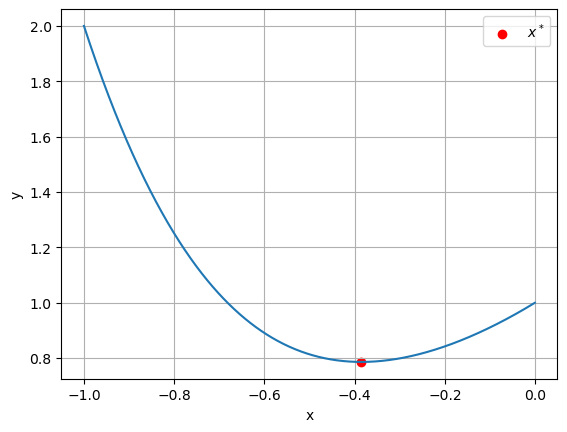

In [6]:
x = np.arange(a, b, 0.001)
y = [f(y) for y in x]

fig, ax = plt.subplots()
ax.scatter(EXACT_MIN_POINT.x, EXACT_MIN_POINT.y, c='r', label='$x^*$')
ax.plot(x, y)
ax.set(xlabel='x', ylabel='y')
ax.legend()
ax.grid()
plt.show()

In [7]:
for eps in (1e-2, 1e-3, 1e-4, 1e-5):
  print(f"ε: {eps}")

  f_wrap = LogPointsWrap(f)
  eps_point = brute_force(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Перебор. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = bitwise_search(f=f_wrap, a=a, b=b, eps=eps, get_init_delta=lambda *args: 0.25)
  print(f'Поразрядный поиск. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = dichotomy(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Дихотомия. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = golden_ratio(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Золотое сечение. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = parabola(f=f_wrap, a=a, b=b, eps=eps, get_init_points=get_init_points_gr)
  print(f'Метод парабол. {eps_point}, N: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  eps_point = midpoint(f=fd1_wrap, a=a, b=b, eps=eps)
  print(f'Метод средней точки. {eps_point}, Nd1: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  eps_point = chord(f=fd1_wrap, a=a, b=b, eps=eps)
  print(f'Метод хорд. {eps_point}, Nd1: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps)
  print(f'Метод Ньютона. {eps_point}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps, use_tau=True)
  print(f'Метод Ньютона-Рафсона. {eps_point}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  f_wrap   = LogPointsWrap(f)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps, f=f_wrap)
  print(f'Метод Марквардта. {eps_point}, N: {len(f_wrap.points)}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')
  print()

ε: 0.01
Перебор. Point(x=-0.39, y=0.7852344099999999), N: 101
Поразрядный поиск. Point(x=-0.38671875, y=0.7851982603315264), N: 13
Дихотомия. Point(x=-0.383046875, y=0.7852062322061241), N: 13
Золотое сечение. Point(x=-0.38854381999831844, y=0.7852133038140368), N: 12
Метод парабол. Point(x=-0.38484083372280703, y=None), N: 5
Метод средней точки. Point(x=-0.3828125, y=None), Nd1: 5
Метод хорд. Point(x=-0.38379118406798174, y=None), Nd1: 5
Метод Ньютона. Point(x=-0.3854585785144336, y=None), Nd1: 3, Nd2: 3
Метод Ньютона-Рафсона. Point(x=-0.38545861330834386, y=None), Nd1: 6, Nd2: 3
Метод Марквардта. Point(x=-0.38555295721894106, y=0.7851952700249685), N: 9, Nd1: 8, Nd2: 8

ε: 0.001
Перебор. Point(x=-0.385, y=0.785195650625), N: 1001
Поразрядный поиск. Point(x=-0.3857421875, y=0.7851954054067392), N: 18
Дихотомия. Point(x=-0.38527685546875, y=0.7851953155454254), N: 21
Золотое сечение. Point(x=-0.3860313206279953, y=0.7851958740757783), N: 16
Метод парабол. Point(x=-0.3850955494956334, y

**Выводы:**
1. Среди методов, использующих значения функции в точке, самый простой (метод перебора) оказался самым неэффективным, количество вычислений значения функции N зависит обратно пропорционально от точности ε. Улучшенный вариант этого метода (метод поразрядного поиска) является намного эффективней, в силу использования унимодальности исследуемой функции.
1. Для методов с исключением отрезков можно рассмотреть формулы для вычисления количества итераций, зависящих от точности. Для метода дихотомии фигурирует log2(x), который растёт быстрее чем ln(x), используемый для метода золотого сечения. Соответственно, для второго метода требуется меньшее кол-во итераций, а значит и меньшее кол-во вычислений значения функции в точке, что и видно из результатов.
1. Метод парабол является наиболее эффективным среди прямых методов, так как в этом методе строится аппроксимирующий многочлен второго порядка с дальнейшим уменьшением отрезка аппроксимации.
1. Сравнивая метод средней точки и метод дихотомии, можно сделать вывод, что первый является почти в два раза эффективней второго метода, так как вычисление двух значений функции вблизи середины очередного отрезка в методе дихотомии можно заменить вычислением одного значения производной исследуемой функции.
1. Рассматривая метод Ньютона можно заметить, что для минимизации исследуемой функции с точностью 0.01, 0.001 и 0.0001 потребовалось одинаковое количество вычислений, что говорит о квадратичной скорости сходимости последовательности.

In [8]:
def newton_f(x):
  return x * math.atan(x) - 1 / 2 * math.log(1 + x**2)

def newton_fd1(x):
  return math.atan(x)

def newton_fd2(x):
  return 1 / (1 + x * x)

NEWTON_EXACT_MIN_POINT = Point(x=0, y=0)

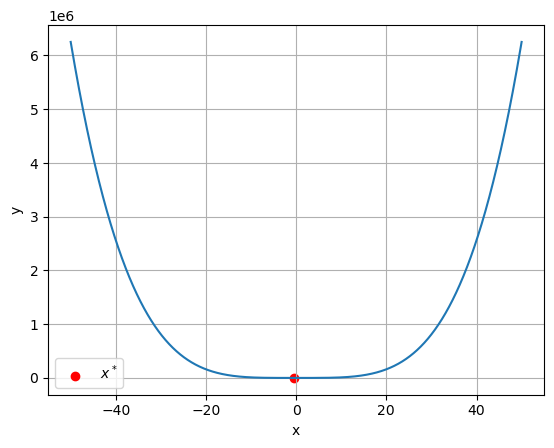

In [9]:
x = np.arange(-50, 50, 0.001)
y = [f(y) for y in x]

fig, ax = plt.subplots()
ax.scatter(EXACT_MIN_POINT.x, EXACT_MIN_POINT.y, c='r', label='$x^*$')
ax.plot(x, y)
ax.set(xlabel='x', ylabel='y')
ax.legend()
ax.grid()
plt.show()

eps = 0.1

In [10]:
a_newt = x[0]
eps_point = None
for x0 in x:
  try:
    eps_point = newton(fd1=newton_fd1, fd2=newton_fd2, x0=x0, eps=eps)
    b_newt = x0
  except ValueError:
    if eps_point is None:
      a_newt = x0
    else:
      break

/tmp/ipykernel_33274/1333368622.py:8: RuntimeWarning: overflow encountered in scalar multiply
  return 1 / (1 + x * x)
/home/alex/code/python/opt_methods/lab1/algos.py:258: RuntimeWarning: divide by zero encountered in scalar divide
  x_new = x - tau * yd1 / (yd2 + mu)
/home/alex/code/python/opt_methods/lab1/algos.py:258: RuntimeWarning: invalid value encountered in scalar subtract
  x_new = x - tau * yd1 / (yd2 + mu)
/home/alex/code/python/opt_methods/lab1/algos.py:258: RuntimeWarning: overflow encountered in scalar divide
  x_new = x - tau * yd1 / (yd2 + mu)


In [11]:
a_raph = x[0]
eps_point = None
for x0 in x:
  try:
    eps_point = newton(fd1=newton_fd1, fd2=newton_fd2, x0=x0, eps=eps, use_tau=True)
    b_raph = x0
  except ValueError:
    if eps_point is None:
      a_raph = x0
    else:
      break

/tmp/ipykernel_33274/1333368622.py:8: RuntimeWarning: overflow encountered in scalar multiply
  return 1 / (1 + x * x)
/home/alex/code/python/opt_methods/lab1/algos.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  x_tau = x - yd1 / yd2
/home/alex/code/python/opt_methods/lab1/algos.py:251: RuntimeWarning: invalid value encountered in scalar subtract
  x_tau = x - yd1 / yd2
/home/alex/code/python/opt_methods/lab1/algos.py:251: RuntimeWarning: overflow encountered in scalar divide
  x_tau = x - yd1 / yd2


In [12]:
a_marq = x[0]
eps_point = None
for x0 in x:
  try:
    eps_point = newton(fd1=newton_fd1, fd2=newton_fd2, x0=x0, eps=eps, f=newton_f)
    b_marq = x0
  except ValueError:
    if eps_point is None:
      a_marq = x0
    else:
      break

In [13]:
# Define the data as a dictionary of lists (or other data structures).
# Keys of the dictionary become column names, and the lists become row data.
data = np.vstack([(a_newt, b_newt), (a_raph, b_raph), (a_marq, b_marq)])
# Define row names (index) as a list.
rows = ["Ньютон", "Рафсон", "Марквардт"]
columns = ['a', 'b']

# Create the DataFrame.
df = pd.DataFrame(data, columns=columns, index=rows)

# Display the DataFrame.
print(df)


                a       b
Ньютон     -1.392   1.391
Рафсон     -3.371   3.370
Марквардт -28.606 -28.409


**Выводы:**
1.  Можно использовать обычный метод Ньютона для минимизации исследуемой функции, но для этого нужно предварительно рассчитать диапазон для начального приближения, иначе последовательность может расходиться.
1.  Метод Ньютона-Рафсона позволяет расширить диапазон для начального приближения при помощи более сложного расчёта новой точки, что требует большего количества вычисления значений производной функции в точке.

In [ ]:
def multi_f1(x):
  return math.cos(x) / x**2

def multi_f2(x):
  return 1 / 10 * x + 2 * math.sin(4*x)

MULTI_F1_MIN_POINT = Point(x=2.45871, y=-0.128325)
MULTI_F2_MIN_POINT = Point(x=1.1750, y=-1.8823)

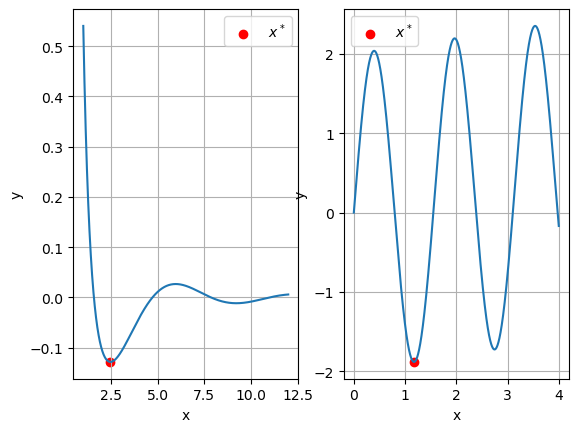

In [15]:
x1 = np.arange(1, 12, 0.001)
x2 = np.arange(0, 4, 0.001)
y1 = [multi_f1(y) for y in x1]
y2 = [multi_f2(y) for y in x2]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(MULTI_F1_MIN_POINT.x, MULTI_F1_MIN_POINT.y, c='r', label='$x^*$')
ax1.plot(x1, y1)
ax1.set(xlabel='x', ylabel='y')
ax1.legend()
ax1.grid()
ax2.scatter(MULTI_F2_MIN_POINT.x, MULTI_F2_MIN_POINT.y, c='r', label='$x^*$')
ax2.plot(x2, y2)
ax2.set(xlabel='x', ylabel='y')
ax2.legend()
ax2.grid()
plt.show()

In [29]:
data = []
rows = []

for eps in (1e-2, 1e-3, 1e-4, 1e-5):
  f1_brute = LogPointsWrap(multi_f1)

  actual_brute = brute_force(f=f1_brute, a=1, b=12, eps=eps)
  f1_poly = LogPointsWrap(multi_f1)
  actual_poly = polygonal_chain(f=f1_poly, a=1, b=12, eps=eps, get_L=lambda *args, **kwargs: 0.5)

  data.append([actual_brute, len(f1_brute.points), actual_poly, len(f1_poly.points)])
  rows.append(eps)

pd.DataFrame(data=data, index=rows, columns=['Перебор', 'N1', 'Ломаные', 'N2'])

,Перебор,N1,Ломаные,N2
0.01000,"Point(x=2.46, y=-0.12832478741709516)",1101,"Point(x=2.459212259811838, y=-0.12832490730739...",58
0.00100,"Point(x=2.459, y=-0.12832492151036126)",11001,"Point(x=2.4541665238973422, y=-0.1283231576210...",128
0.00010,"Point(x=2.4587000000000003, y=-0.1283249284679...",110001,"Point(x=2.4584769171885656, y=-0.1283249236776...",498
0.00001,"Point(x=2.45871, y=-0.12832492848360486)",1100001,"Point(x=2.458700135141239, y=-0.1283249284682596)",1400


In [31]:
data = []
rows = []

for eps in (1e-2, 1e-3, 1e-4, 1e-5):
  f2_brute = LogPointsWrap(multi_f2)

  actual_brute = brute_force(f=f2_brute, a=0, b=4, eps=eps)
  f2_poly = LogPointsWrap(multi_f2)
  actual_poly = polygonal_chain(f=f2_poly, a=0, b=4, eps=eps, get_L=lambda *args, **kwargs: 82/10)

  data.append([actual_brute, len(f2_brute.points), actual_poly, len(f2_poly.points)])
  rows.append(eps)

pd.DataFrame(data=data, index=rows, columns=['Перебор', 'N1', 'Ломаные', 'N2'])

,Перебор,N1,Ломаные,N2
0.01000,"Point(x=1.17, y=-1.881951045654568)",401,"Point(x=1.175391297000599, y=-1.882343716962165)",68
0.00100,"Point(x=1.175, y=-1.8823465151282017)",4001,"Point(x=1.174666210221601, y=-1.8823450299292261)",166
0.00010,"Point(x=1.175, y=-1.8823465151282017)",40001,"Point(x=1.1749574391621171, y=-1.8823465240562...",606
0.00001,"Point(x=1.17497, y=-1.882346527450083)",400001,"Point(x=1.1749711798049993, y=-1.8823465275094...",1690


**Выводы:**
Метод ломаных требует меньшего количества вычислений функции, однако нужно вычислить L.

## Контрольные вопросы


1.  Пусть $f(x)$ − дифференцируемая унимодальная на отрезке $[a, b]$ функция, причем $|f'(x)| \le M$. Оценить точность $\Delta(N)$ при определении минимального значения $f^*$ методом перебора в результате $N$ вычислений $f(x)$.

$$
L = max_{[a,b]}|f'(x)| = M
$$

$$
|f(x_k) - f(x^*)| \le L|x_k - x^*| \le M|x_k - x^*| \le M\frac{b - a}{N - 1}
$$

$$
\Delta(N) \le M\frac{b - a}{N - 1}
$$

2.  Может ли оценка $\epsilon(N) = \frac{b - a}{N - 1}$ для точности определения $x^*$ методом перебора нарушаться для функций, не являющихся унимодальными? Ответ пояснить рисунком.

Да

3.  Какие прямые методы называются методами пассивного поиска? Последовательного поиска?

В методе перебора точки $x_i$, в которых определяются значения $f(x)$, выбираются заранее (*прямые методы пассивного поиска*). Если же для выбора очередной точки вычисления $f(x)$ использовать информацию, содержащуюся в уже найденных ее значениях, то поиск точки минимума можно сделать более эффективным, т.е. сократить число определяемых для этого значений $f(x)$ (*прямые методы последовательного* поиска).

4.  Повысится ли эффективность метода поразрядного поиска, если шаг поиска $\Delta$ последовательно уменьшать не в четыре, а в какое-либо другое число раз?

Эффективно переиспользовать точки, поэтому делить нужно нацело, чтобы точки, взятые с меньшим шагом, приходились на уже вычисленные.

5. В чем состоит идея метода исключения отрезков?

Один из путей (*исключения отрезков*) более эффективного поиска точки $x^∗$ следует из определения унимодальных функций. Действительно, пусть $a < x_1 < x_2 < b$. Сравнив значения $f(x)$ в пробных точках $x_1$ и $x_2$, можно сократить отрезок поиска точки $x^∗$, перейдя к отрезку $[a, x_2]$, если $f(x_1) \le f(x_2)$, или к отрезку $[x_1, b]$, если $f(x_1) \ge f(x_2)$. Описанную процедуру можно повторить необходимое число раз, последовательно уменьшая отрезок, содержащий точку минимума.

6.  Может ли применение методов исключения отрезков привести к неверному определению $x^*$, если функция $f(x)$ не унимодальна? Ответ пояснить рисунком.

Да

7.  Зависит ли точность определения $x^*$, которую гарантируют методы дихотомии и золотого сечения в результате $N$ вычислений $f(x)$, от конкретной функции $f(x)$?

Дихотомия:
$$
\epsilon(N) = \frac{b - a}{2^{\frac{N}{2} + 1}}
$$

Золотого сечения:

$$
\epsilon(N) = \frac{1}{2}\left(\frac{\sqrt{5} - 1}{2}\right) ^ {N - 1}(b - a)
$$

**Вывод**: не зависит

8.  Требуется найти точку минимума унимодальной функции на отрезке длины 1 с точностью $\epsilon = 0.02$. Имеется возможность измерить не более 10 значений $f(x)$. Какой из прямых методов минимизации можно использовать для этого?

In [37]:
ab = 1
N = 10
eps = 0.02

eps_golden = 1 / 2 * ((math.sqrt(5) - 1) / 2) ** (N - 1) * ab
eps_dich = ab / (2 ** (N / 2 + 1))
eps_brute = ab / (N - 1)

res = [
  (eps_golden, 'Золотое сечение'),
  (eps_dich, 'Дихотомия'),
  (eps_brute, 'Перебор'),
]

print(f'Золотое сечение: {eps_golden}, Дихотомия: {eps_dich}, Перебор: {eps_brute}')
print([el[1] for el in filter(lambda x: x[0] <= eps, res)])

Золотое сечение: 0.006577808748212424, Дихотомия: 0.015625, Перебор: 0.1111111111111111
['Золотое сечение', 'Дихотомия']


9. Доказать, что погрешность определения точки минимума $x^*$ функции $f(x)$ методом перебора не превосходит величины $\epsilon_n = (b - a) / n$.

см методичку

![brute](./img/brute.png)

10.  Доказать, что в методе дихотомии число итераций, необходимое для определения точки минимума с точностью $\epsilon$, определяется формулой $n \ge \log_n\frac{b - a - \delta}{2\epsilon - \delta}$.

См методичку

![dich](./img/dich.png)

11. Доказать, что число итераций, необходимое для достижения заданной точности $\epsilon$ на отрезке $[a, b]$ в методе золотого сечения определяется формулой $n \ge \ln\left(\frac{2\epsilon}{b-a}\right)/\ln\tau \approx 2,1\ln\left(\frac{b - a}{2\epsilon}\right)$.

![golden](./img/golden.png)

12. Сравнить необходимые количества вычисленных значений $N_\delta$ и $N_n$ функции $f(x)$ при поиске ее точки минимума на отрезке длины 1 с точностью $10^{-5}$ методом деления отрезка пополам и методом перебора.

In [44]:
ab = 1
eps = 10 ** -5

n_brute = ab / eps + 1
delta = eps / 5
n_dich = math.log2((ab - delta) / (2 * eps - delta)) + 1

print(f'N_n / N_d: {n_brute / n_dich}')


N_n / N_d: 5966.062743754693


13. Зависит ли точность определения $x^*$, которая получается методом парабол в результате $N$ вычислений функции $f(x)$, от конкретной функции $f(x)$?

![parabola](./img/parabola.png)

Зависит

14. Указать класс функций, для точного определения точек минимума которых достаточно одной итерации метода парабол.

Минимум параболы вычисляется за одну итерацию

$$
y = ax^2 + bx + c
$$

15. В окрестности точки минимума $x^*$ график $f_1(x)$ близок к симметричному относительно вертикальной оси, проходящей через точку $x^*$, а график $f_2(x)$ заметно асимметричен. Для какой из этих функций следует ожидать более высокой скорости сходимости, применяя метод парабол?

Для симметричной функции следует ожидать более высокую скорость сходимости, т.к. парабола — симметричная функция, а значит лучше аппроксимирует также симметричные функции.

16. Пусть $f(x)$ − выпуклая дифференцируемая функция и $|f'(\overline{x})| \le \epsilon$. Можно ли указать погрешности определения точки минимума $x^*$ и минимального значения $f^*$ по формулам $x^* = \overline{x}$, $f^* = f(\overline{x})$? Ответ пояснить рисунком.

$$
|f(x^*) - f(\overline{x})| \le \epsilon|x^* - \overline{x}|
$$